In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
fpt = pd.read_csv('/content/drive/MyDrive/data_Stocks/FPT.csv')
msn = pd.read_csv('/content/drive/MyDrive/data_Stocks/MSN.csv')
pnj = pd.read_csv('/content/drive/MyDrive/data_Stocks/PNJ.csv')
vic = pd.read_csv('/content/drive/MyDrive/data_Stocks/VIC.csv')

In [ ]:
fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [ ]:
msn.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [ ]:
pnj.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [ ]:
vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


# I. Data Processing

###Converting Date (Object) to Datetime

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split(" ")
    date_part = split[0].split("/")
    if len(date_part) == 1:
        date_part = split[0].split("-")
        month = int(date_part[0])
        day = int(date_part[1])
        year = int(date_part[2])
    else:
        month = int(date_part[0])
        day = int(date_part[1])
        year = int(date_part[2])
    time_part = split[1].split(":")
    hour = int(time_part[0])
    minute = int(time_part[1])
    return datetime.datetime(month=month, day=day,year=year, hour=hour, minute=minute)

x = str_to_datetime('12/25/2017 9:15')
print(x)

2017-12-25 09:15:00


In [ ]:
fpt['Date/Time'] = fpt['Date/Time'].apply(str_to_datetime)
msn['Date/Time'] = msn['Date/Time'].apply(str_to_datetime)
vic['Date/Time'] = vic['Date/Time'].apply(str_to_datetime)
pnj['Date/Time'] = pnj['Date/Time'].apply(str_to_datetime)


### Close Volatility

In [ ]:
fpt['Close Volatility'] = np.log(fpt.Close) - np.log(fpt.Close.shift(1))
msn['Close Volatility'] = np.log(msn.Close) - np.log(msn.Close.shift(1))
vic['Close Volatility'] = np.log(vic.Close) - np.log(vic.Close.shift(1))
pnj['Close Volatility'] = np.log(pnj.Close) - np.log(pnj.Close.shift(1))
fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000


In [ ]:
fpt['Volume Volatility'] = np.log(fpt.Volume) - np.log(fpt.Volume.shift(1))
msn['Volume Volatility'] = np.log(msn.Volume) - np.log(msn.Volume.shift(1))
vic['Volume Volatility'] = np.log(vic.Volume) - np.log(vic.Volume.shift(1))
pnj['Volume Volatility'] = np.log(pnj.Volume) - np.log(pnj.Volume.shift(1))
fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593,-5.227725
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275,1.774060
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000,0.638087
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000,2.362099


### Volatility

### Previous 2 hours Volatility

In [ ]:
fpt['Previous_2_hours_Volatility'] = fpt['Close Volatility'].rolling(window = 120).std()
msn['Previous_2_hours_Volatility'] = msn['Close Volatility'].rolling(window = 120).std()
vic['Previous_2_hours_Volatility'] = vic['Close Volatility'].rolling(window = 120).std()
pnj['Previous_2_hours_Volatility'] = pnj['Close Volatility'].rolling(window = 120).std()
fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN,NaN,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593,-5.227725,NaN
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275,1.774060,NaN
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000,0.638087,NaN
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000,2.362099,NaN


### Previous 4 Hours Volatility

In [ ]:
fpt['Previous_4_Hours_Volatility'] = fpt['Close Volatility'].rolling(window = 240).std()
msn['Previous_4_Hours_Volatility'] = msn['Close Volatility'].rolling(window = 240).std()
vic['Previous_4_Hours_Volatility'] = vic['Close Volatility'].rolling(window = 240).std()
pnj['Previous_4_Hours_Volatility'] = pnj['Close Volatility'].rolling(window = 240).std()

fpt.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility,Previous_4_Hours_Volatility
97401,FPT,2020-12-22 14:24:00,58.2,58.2,58.2,58.2,27470,0,0.00000,-0.107906,0.001324,0.001383
97402,FPT,2020-12-22 14:25:00,58.2,58.2,58.2,58.2,14820,0,0.00000,-0.617117,0.001324,0.001365
97403,FPT,2020-12-22 14:26:00,58.2,58.2,58.2,58.2,500,0,0.00000,-3.389125,0.001312,0.001365
97404,FPT,2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0,-0.00172,1.609438,0.001315,0.001370
97405,FPT,2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0,0.00000,1.496941,0.001304,0.001370


### Next 2 hours Volatility

In [ ]:
fpt['Next_2_hours_Volatility'] = fpt['Close Volatility'].iloc[::-1].rolling(window = 120).std().iloc[::-1]
msn['Next_2_hours_Volatility'] = msn['Close Volatility'].iloc[::-1].rolling(window = 120).std().iloc[::-1]
vic['Next_2_hours_Volatility'] = vic['Close Volatility'].iloc[::-1].rolling(window = 120).std().iloc[::-1]
pnj['Next_2_hours_Volatility'] = pnj['Close Volatility'].iloc[::-1].rolling(window = 120).std().iloc[::-1]

fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility,Previous_4_Hours_Volatility,Next_2_hours_Volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN,NaN,NaN,NaN,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593,-5.227725,NaN,NaN,0.002093
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275,1.774060,NaN,NaN,0.002081
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000,0.638087,NaN,NaN,0.002070
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000,2.362099,NaN,NaN,0.002072


In [ ]:
full_data = pd.concat([fpt, msn, pnj, vic], ignore_index=True)

In [ ]:
full_data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility,Previous_4_Hours_Volatility,Next_2_hours_Volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN,NaN,NaN,NaN,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593,-5.227725,NaN,NaN,0.002093
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275,1.774060,NaN,NaN,0.002081
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000,0.638087,NaN,NaN,0.002070
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000,2.362099,NaN,NaN,0.002072


In [ ]:
full_data.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility,Previous_4_Hours_Volatility,Next_2_hours_Volatility
459330,VIC,2020-12-22 14:22:00,105.8,105.8,105.7,105.7,1870,0,-0.000946,0.558280,0.001162,0.001520,NaN
459331,VIC,2020-12-22 14:23:00,105.7,105.7,105.7,105.7,2510,0,0.000000,0.294344,0.001158,0.001515,NaN
459332,VIC,2020-12-22 14:24:00,105.7,105.7,105.7,105.7,3620,0,0.000000,0.366191,0.001155,0.001504,NaN
459333,VIC,2020-12-22 14:25:00,105.7,105.7,105.7,105.7,100,0,0.000000,-3.589059,0.001152,0.001504,NaN
459334,VIC,2020-12-22 14:46:00,105.7,105.7,105.7,105.7,90,0,0.000000,-0.105361,0.001152,0.001504,NaN


In [ ]:
full_data = full_data.fillna(0)

In [ ]:
full_data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility,Previous_4_Hours_Volatility,Next_2_hours_Volatility
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,0.000000,0.000000,0.0,0.0,0.000000
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593,-5.227725,0.0,0.0,0.002093
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275,1.774060,0.0,0.0,0.002081
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000,0.638087,0.0,0.0,0.002070
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000,2.362099,0.0,0.0,0.002072


### LSTM model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_convert = LabelEncoder()

# Assuming you have your data in a DataFrame named 'dataa'
full_data['Ticker'] = label_convert.fit_transform(full_data['Ticker'])
full_data

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Close Volatility,Volume Volatility,Previous_2_hours_Volatility,Previous_4_Hours_Volatility,Next_2_hours_Volatility
0,0,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.002593,-5.227725,0.000000,0.000000,0.002093
2,0,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.002275,1.774060,0.000000,0.000000,0.002081
3,0,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.000000,0.638087,0.000000,0.000000,0.002070
4,0,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.000000,2.362099,0.000000,0.000000,0.002072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459330,3,2020-12-22 14:22:00,105.80,105.80,105.70,105.70,1870,0,-0.000946,0.558280,0.001162,0.001520,0.000000
459331,3,2020-12-22 14:23:00,105.70,105.70,105.70,105.70,2510,0,0.000000,0.294344,0.001158,0.001515,0.000000
459332,3,2020-12-22 14:24:00,105.70,105.70,105.70,105.70,3620,0,0.000000,0.366191,0.001155,0.001504,0.000000
459333,3,2020-12-22 14:25:00,105.70,105.70,105.70,105.70,100,0,0.000000,-3.589059,0.001152,0.001504,0.000000


In [ ]:
# Assuming 'full_data' is your original DataFrame
X = np.array(full_data.drop(["Ticker", "Next_2_hours_Volatility", 'Date/Time', 'Low', 'High', 'Close', 'Open', 'Volume'], axis=1).values)
y = np.array(full_data["Next_2_hours_Volatility"].values).reshape(-1, 1)

# Set the random state for reproducibility
random_state = 42

# Split the data into training and testing sets using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(367468, 5) (367468, 1)
(91867, 5) (91867, 1)


In [ ]:
def get_lagged(x, y, t, s):

    lagged = []

    for i in range(x.shape[0] - t):

        if i == x.shape[0] - t:

            break

        for k in range(t):

            if k < t:

                lagged.append(x[i+k])

    lagged = np.array(lagged).reshape(s)

    return lagged, y[:lagged.shape[0],]

In [ ]:
N = 30

X_train, y_train = get_lagged(X_train, y_train, N, (X_train.shape[0]-N, N*X_train.shape[1]))
X_test, y_test = get_lagged(X_test, y_test, N, (X_test.shape[0]-N, N*X_test.shape[1]))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(367438, 150) (91837, 150)
(367438, 1) (91837, 1)


In [ ]:
T = 4

X_train, y_train = get_lagged(X_train, y_train, T, (X_train.shape[0]-T, T, X_train.shape[1]))
X_test, y_test = get_lagged(X_test, y_test, T, (X_test.shape[0]-T, T, X_test.shape[1]))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(367434, 4, 150) (91833, 4, 150)
(367434, 1) (91833, 1)


In [ ]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model

inputLSTM = Input(shape=(X_train.shape[1], X_train.shape[2]))
y = LSTM(200, return_sequences=True)(inputLSTM)
y = LSTM(200)(y)
y = Dense(1)(y)
lstm = Model(inputs=inputLSTM, outputs=y)
lstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 4, 200)              │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 601,801 (2.30 MB)

 Trainable params: 601,801 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
lstm.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='mean_squared_error',
              metrics=['root_mean_squared_error'])

In [ ]:
hist = lstm.fit(X_train, y_train, epochs=50, batch_size=700, validation_split=0.2)

Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0099 - root_mean_squared_error: 0.0814 - val_loss: 1.5009e-05 - val_root_mean_squared_error: 0.0039
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.4901e-05 - root_mean_squared_error: 0.0039 - val_loss: 1.4787e-05 - val_root_mean_squared_error: 0.0038
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.4693e-05 - root_mean_squared_error: 0.0038 - val_loss: 1.4699e-05 - val_root_mean_squared_error: 0.0038
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.4617e-05 - root_mean_squared_error: 0.0038 - val_loss: 1.4598e-05 - val_root_mean_squared_error: 0.0038
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.4505e-05 - root_mean_squared_error: 0.0038 - val_loss: 1.4554e-05 - val_root_mean_squared_error: 0.0038
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.4526e-05 - root_mean_squared_error: 0.0038 - val_loss: 1.4569e-05 - val_root_mean_squared_error: 0.0038
Epoc

### Plotting the RSME for training and validation

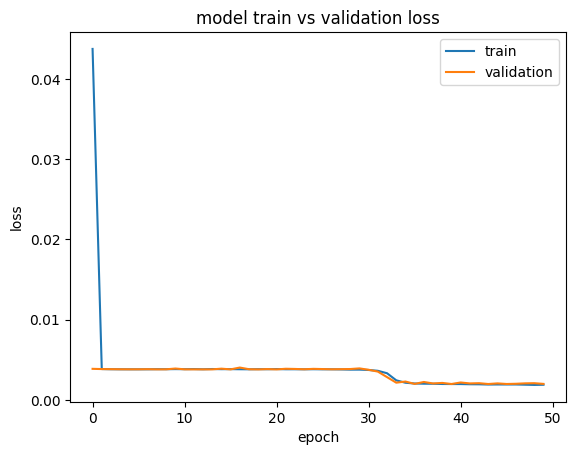

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
for ind, i in enumerate(lstm.predict(X_test)):

    print('Prediction: ' + str('{:.2f}'.format(round(100 * round(i[0], 4),3))) + ',    ' + 'Actual Value: ' + str('{:.2f}'.format(round(100 * round(y_test[ind][0],4),2))))

Streaming output truncated to the last 5000 lines.
Prediction: 0.18,    Actual Value: 0.10
Prediction: 0.16,    Actual Value: 0.11
Prediction: 1.20,    Actual Value: 1.36
Prediction: 0.19,    Actual Value: 0.24
Prediction: 0.17,    Actual Value: 0.14
Prediction: 0.18,    Actual Value: 0.15
Prediction: 0.25,    Actual Value: 0.70
Prediction: 0.19,    Actual Value: 0.11
Prediction: 0.21,    Actual Value: 0.12
Prediction: 0.19,    Actual Value: 0.64
Prediction: 0.19,    Actual Value: 0.06
Prediction: 0.45,    Actual Value: 0.37
Prediction: 0.21,    Actual Value: 0.14
Prediction: 0.33,    Actual Value: 0.13
Prediction: 1.05,    Actual Value: 1.45
Prediction: 0.17,    Actual Value: 0.15
Prediction: 0.17,    Actual Value: 0.13
Prediction: 0.15,    Actual Value: 0.28
Prediction: 0.27,    Actual Value: 0.85
Prediction: 0.30,    Actual Value: 0.71
Prediction: 0.20,    Actual Value: 0.15
Prediction: 0.19,    Actual Value: 0.06
Prediction: 0.26,    Actual Value: 0.24
Prediction: 0.20,    Actual V

In [ ]:
import math
from sklearn.metrics import r2_score, mean_squared_error

def printing_out_results_of_a_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Print the R2 score
    print("R2 score:\n")
    print(('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print("\n")

    # Print the RMSE
    print("RMSE:\n")
    print(math.sqrt(mean_squared_error(y_test, y_pred)))

    print('\n')

    # Print the mean squared error
    print("Mean Squared Error:\n")
    print(mean_squared_error(y_test, y_pred))

In [ ]:
printing_out_results_of_a_model(lstm, X_test, y_test)

2870/2870 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
R2 score:

72.67 %


RMSE:

0.0019982247978345955


Mean Squared Error:

3.99290234268111e-06
